In [1]:
!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df_train=pd.read_csv('digit-recognizer/train.csv')

In [5]:
df_train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [6]:
df_train.shape

(42000, 785)

In [7]:
df_train.sample(10)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
8909       4       0       0       0       0       0       0       0       0   
38987      3       0       0       0       0       0       0       0       0   
4765       6       0       0       0       0       0       0       0       0   
38346      1       0       0       0       0       0       0       0       0   
37868      1       0       0       0       0       0       0       0       0   
15450      3       0       0       0       0       0       0       0       0   
14516      1       0       0       0       0       0       0       0       0   
39440      6       0       0       0       0       0       0       0       0   
656        9       0       0       0       0       0       0       0       0   
3594       0       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
8909        0  ...         0         0         0         0         0   
38987       0  ...         0         0         0         0         0   
4765        0  ...         0         0         0         0         0   
38346       0  ...         0         0         0         0         0   
37868       0  ...         0         0         0         0         0   
15450       0  ...         0         0         0         0         0   
14516       0  ...         0         0         0         0         0   
39440       0  ...         0         0         0         0         0   
656         0  ...         0         0         0         0         0   
3594        0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
8909          0         0         0         0         0  
38987         0         0         0         0         0  
4765          0         0         0         0         0  
38346         0         0         0         0         0  
37868         0         0         0         0         0  
15450         0         0         0         0         0  
14516         0         0         0         0         0  
39440         0         0         0         0         0  
656           0         0         0         0         0  
3594          0         0         0         0         0  

[10 rows x 785 columns]

In [8]:
data_20855= df_train.iloc[20855]
data_20855

label       6
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 20855, Length: 785, dtype: int64

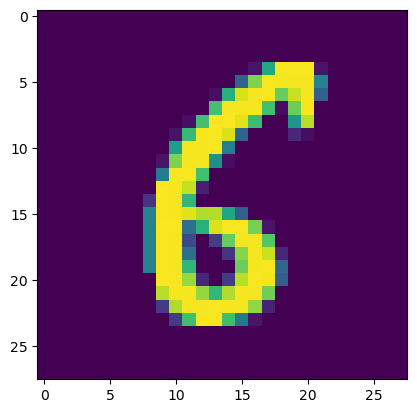

In [9]:
plt.imshow(data_20855[1:].values.reshape(28,28))

In [10]:
X = df_train.drop( columns = ['label'], axis = 1)
y = df_train['label']

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(33600, 784)

In [13]:
scaler= StandardScaler()

X_train_trf=scaler.fit_transform(X_train)
X_test_trf= scaler.transform(X_test)

In [17]:
pca= PCA(n_components=2)

In [18]:
X_train_pca= pca.fit_transform(X_train_trf)
X_test_pca= pca.transform(X_test_trf)

In [16]:
X_test_pca.shape

(8400, 100)

In [19]:
y_train_pca= y_train.astype(str)

In [21]:
fig= px.scatter(x= X_train_pca[:,0],
                y=X_train_pca[:,1],
                color=y_train_pca,
                color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

### For 3D Visualization using plotly

In [22]:
pca= PCA(n_components=3)
X_train_pca= pca.fit_transform(X_train_trf)
X_test_pca= pca.transform(X_test_trf)

y_train_pca= y_train.astype(str)



In [24]:
fig= px.scatter_3d(x=X_train_pca[:,0], y=X_train_pca[:,1], z=X_train_pca[:,2], color=y_train_pca)
fig.update_layout( margin=dict(l=20, r=20, t=20, b=20))
fig.show()